<a href="https://colab.research.google.com/github/euna-jeong20/deep-learning-from-scratch/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1장

In [ ]:
import numpy as np

x = np.array([1, 2, 3])
print(x.__class__)

print(x.shape)
print(x.ndim)

W = np.array([[1, 2, 3], [4, 5, 6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


In [ ]:
A = np.array([[1, 2] , [3, 4]])
print(A * 10)

[[10 20]
 [30 40]]


In [ ]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
print(A * b)

[[10 40]
 [30 80]]


In [ ]:
#벡터의 내적 - dot
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))

#행렬의 곱 - matmul
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.matmul(A, B))

32
[[19 22]
 [43 50]]


In [ ]:
import numpy as np

W1 = np.random.randn(2, 4)  # 가중치
b1 = np.random.randn(4)     # 편향
x = np.random.randn(10, 2)  # 입력
h = np.matmul(x, W1) + b1

print(h.shape)

(10, 4)


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#형태 맞추기
x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2

print(s.shape)

(10, 3)


In [ ]:
import numpy as np

class Sigmoid:
  def __init__(self):
    self.params = []    #1권에서는 딕셔너리

  def forward(self, x):
    return 1 / (1 + np.exp(-x))

class Affine:
  def __init__(self, W, b):
    self.params = [W, b]

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    return out

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size
    
    #가중치와 편향 초기화
    W1 = np.random.randn(I, H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H, O)
    b2 = np.random.randn(O)

    #계층생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]

    #모든 가중치를 리스트에 모은다
    self.params = []
    for layer in self.layers:
      self.params += layer.params

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

In [ ]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [ ]:
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)               # 입력      행으로 계산하고 싶어서
y = np.repeat(x, N, axis=0)             # 순전파      N번 복제를 세로 방향으로 하고 싶다
dy = np.random.randn(N, D)              # 무작위 기울기     7X8
dx = np.sum(dy, axis=0, keepdims=True)  # 역전파       열끼리 다 더한다/

In [ ]:
import numpy as np

D, N = 8, 7
x = np.random.randn(N, D)              # 입력
y = np.sum(x, axis=0, keepdims=True)   # 순전파

dy = np.random.randn(1, D)             # 무작위 기울기
dx = np.repeat(dy, N, axis=0)          # 역전파

In [ ]:
class MatMul:
  def __init__(sself, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None
  
  def forward(self, x):
    W,  = self.params
    out = np.matmul(x, W)
    self.x = x
    return out

  def backward(self, dout):
    W,  =self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    self.grads[0][...] = dW
    return dx

In [ ]:
list1 = [1, 2, 3]
list2 = list1 #얕은 복사 메모리가 저장

#깊은 복사
list2 = list1[:]
list2 = list1.copy()

In [ ]:
class Sigmoid:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None
  
  def forward(self, x):
    out = 1 / (1 +np.exp(-x))
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

In [ ]:
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None
  
  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    self.x = x
    return out

  def backward(self, dout):
    W, b =self.params
    dx = np.matmul(dout, W.T)
    dw = np.matmul(self.x.T, dout)
    db = np.sum(dout,axis=0)

    self.grads[0][...] = dw
    self.grads[1][...] = db
    return dx

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = %ldir
    
  def update(self, params, grads):
    for i in randge(len(params)):
      params[i] -= self.lr * grads[i]

In [ ]:
import numpy as np
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master')

from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)


x (300, 2)
t (300, 3)


In [ ]:
import numpy as np
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master')

from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size
    
    #가중치와 편향 초기화
    W1 = 0.01 * np.random.randn(I, H)   #가중치를 작은 무작위 값으로 설정하면 학습이 잘 될 가능성이 커져서 0.01을 곱해준다
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H, O)
    b2 = np.zeros(O)


    #계층생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
    self.loss_layer = SoftmaxWithLoss()

    #모든 가중치와 기울기를 리스트에 모은다.  p39참고
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

In [ ]:
def predict(self, x):
  for layer in self.layers:
    x = layer.forward(x)
  return x

def forward(self, x, t):
  score = self.predict(x)
  loss = self.loss_layer.forward(score, t)
  return loss

def backward(self, dout=1):
  dout = self.loo_layer.backward(dout)
  for layer in reversed(self.layers):
    dout = layer.backward(dout)
  return dout
  

In [ ]:
import numpy as np
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master')



from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from ch01.two_layer_net import TwoLayerNet

#1 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

#2 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

#학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  #3 데이터 뒤섞기
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters * batch_size : (iters+1) * batch_size]
    batch_t = t[iters * batch_size : (iters+1) * batch_size]

    #4 기울기를 구해 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss += loss
    loss_count += 1

    #5 정기적으로 학습 경과 출력
    if (iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print('| 에폭 %d | 반복  %d / %d | 손실 %.2f' % (epoch +1, iters +1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

| 에폭 1 | 반복  10 / 10 | 손실 1.13
| 에폭 2 | 반복  10 / 10 | 손실 1.13
| 에폭 3 | 반복  10 / 10 | 손실 1.12
| 에폭 4 | 반복  10 / 10 | 손실 1.12
| 에폭 5 | 반복  10 / 10 | 손실 1.11
| 에폭 6 | 반복  10 / 10 | 손실 1.14
| 에폭 7 | 반복  10 / 10 | 손실 1.16
| 에폭 8 | 반복  10 / 10 | 손실 1.11
| 에폭 9 | 반복  10 / 10 | 손실 1.12
| 에폭 10 | 반복  10 / 10 | 손실 1.13
| 에폭 11 | 반복  10 / 10 | 손실 1.12
| 에폭 12 | 반복  10 / 10 | 손실 1.11
| 에폭 13 | 반복  10 / 10 | 손실 1.09
| 에폭 14 | 반복  10 / 10 | 손실 1.08
| 에폭 15 | 반복  10 / 10 | 손실 1.04
| 에폭 16 | 반복  10 / 10 | 손실 1.03
| 에폭 17 | 반복  10 / 10 | 손실 0.96
| 에폭 18 | 반복  10 / 10 | 손실 0.92
| 에폭 19 | 반복  10 / 10 | 손실 0.92
| 에폭 20 | 반복  10 / 10 | 손실 0.87
| 에폭 21 | 반복  10 / 10 | 손실 0.85
| 에폭 22 | 반복  10 / 10 | 손실 0.82
| 에폭 23 | 반복  10 / 10 | 손실 0.79
| 에폭 24 | 반복  10 / 10 | 손실 0.78
| 에폭 25 | 반복  10 / 10 | 손실 0.82
| 에폭 26 | 반복  10 / 10 | 손실 0.78
| 에폭 27 | 반복  10 / 10 | 손실 0.76
| 에폭 28 | 반복  10 / 10 | 손실 0.76
| 에폭 29 | 반복  10 / 10 | 손실 0.78
| 에폭 30 | 반복  10 / 10 | 손실 0.75
| 에폭 31 | 반복  10 / 10 | 손실 0.78
| 에폭 32 | 반복  10 

In [ ]:
import numpy as np
print(np.random.permutation(10))
print(np.random.permutation(10))

[5 1 8 4 9 7 0 2 6 3]
[3 4 2 7 8 5 6 0 9 1]


| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

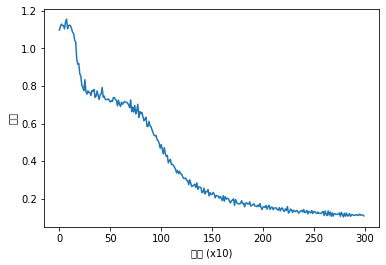

In [ ]:
import numpy as np
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from ch01.two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3 )
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

In [ ]:
b = np.random.randn(3).astype(np.float32)
print(b.dtype)

c = np.random.randn(3).astype('f')
print(c.dtype)

float32
float32


#2장

##2.3.1 파이썬으로 말뭉치로 전처리하기

In [ ]:
text = 'You say goodbye and I say hello.' 
text = text.lower()   # 문장을 소문자로
text = text.replace('.', ' .')    #두번째는 문자 점을 표현하고 싶어서 띄우고 점을 입력
print(text)

words = text.split(' ')
print(words)

you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [ ]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word


print(id_to_word)
print(word_to_id)

print(id_to_word[1])
print(word_to_id['hello'])

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
say
5


In [ ]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)

[0 1 2 3 4 1 5 6]


##2.3.4 동시발생 행렬

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.util import  preprocess

text = 'You say goodbye and I say hello.' 
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)   # corpus는 단어 id 목록
# [0 1 2 3 4 1 5 6]

print(id_to_word)
# {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):     #idx 는 [0 1 2 3 4 5 6 7] /  word_id 는 [0 1 2 3 4 1 5 6]
    for i in range(1, window_size +1):
      left_idx = idx - i
      right_idx = idx + i

      #왼쪽 끝과 오른쪽 끝을 안 벗어 날때만 1을 추가해준다
      # say일 경우에 한 행에서 두번 계산 된다

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix



text = 'You say goodbye and I say hello.' 
corpus, word_to_id, id_to_word = preprocess(text)
print(create_co_matrix(corpus, 7))

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


##2.3.5 벡터 간 유사도

In [ ]:
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2))   #x의 정규화
  ny = y / np.sqrt(np.sum(y**2))   #y의 정규화
  return np.dot(nx, ny)

In [ ]:
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2))   #x의 정규화
  ny = y / np.sqrt(np.sum(y**2))   #y의 정규화
  return np.dot(nx, ny)

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/common")
sys.path.append('os.chdir')

from util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say helllo.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] #you의 단어 벡터  행으로 뽑는다
c1 = C[word_to_id['i']]   #i의 단어 벡터    행으로 뽑는다

print(cos_similarity(c0, c1))   #0.7071067691154799

0.7071067691154799


##2.3.6 유사 단어의 랭킹 표시

In [ ]:
import numpy as np

def most_similar(query, word_to_id, id_to_word, word_matrix,top=5):

  # 1 검색어를 꺼낸다
  if query not in word_to_id:
    print('%s(을)를 찾을 수없습니다.' %query)
    return

  print('\n[query] ' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # 2 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)

  # 3 코사인 유사도를 기준으로 내림차순으로 출력
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:      #같으면 출력할 필요 없으니까 continue를 사용 
      continue
    
    print(' %s: %s' % (id_to_word[i], similarity[i]))
    count += 1
    
    if count >= top:
      return


In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/common")
sys.path.append('os.chdir')

import numpy as np
from util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say helllo.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

print(most_similar('you', word_to_id, id_to_word, C,top=5))


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 helllo: 0.7071067691154799
 say: 0.0
 and: 0.0
None


##2.4.1 상호 정보량

In [ ]:
import numpy as np

def ppmi(C, verbose=False, eps=1e-8):
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)   #행을 기준으로 더함
  total = C.shapep[0] * C.shape[1]
  cnt = 0

  for i in randge(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps)
      M[i, j] = max(0, pmi)

      if verbose:
        cnt += 1
        if cnt % (total//100) == 0:
          print('%.1f%% 완료' % (100*cnt/total))

  return M

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  #유효 자릿수를 세 자리로 표시
print('동시발행 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발행 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


##2.4.3 SVD에 의한 차원 감소

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]
[0.341 0.   ]


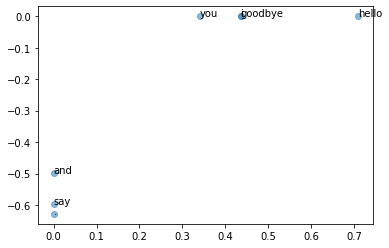

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(C[0])   # 동시발생 행렬
              # [0 1 0 0 0 0 0]

print(W[0])   # PPMI 행렬
              # [0.    1.807 0.    0.    0.    0.    0.   ]
            
print(U[0])   # SVD
              # [ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16 -2.426e-17]

# U의 차원을 만약 2차원 벡터로 줄이려면 처음 두 원소를 꺼냄

print(U[0, :2]) # [0.341 0.   ]

for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

##2.4.4 PTB 데이터셋

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')   # 데이터를 읽어 들임 
                                                          # train 훈련용
                                                          # test 테스트용
                                                          # valid 검증용

print('말뭉치 크기 : ', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0] :', id_to_word[0])
print('id_to_word[1] :', id_to_word[1])
print('id_to_word[2] :', id_to_word[2])
print()
print("word_to_id['car'] : ", word_to_id['car'])
print("word_to_id['happy'] : ", word_to_id['happy'])
print("word_to_id['lexus'] : ", word_to_id['lexus'])


말뭉치 크기 :  929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] : aer
id_to_word[1] : banknote
id_to_word[2] : berlitz

word_to_id['car'] :  3856
word_to_id['happy'] :  4428
word_to_id['lexus'] :  7426


##2.4.5 PTB 데이터셋 평가

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
  #truncated SVD (빠르다!)
  from sklenarn.utils.extmath import randomized_svd
  U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
  # SVD (느리다)
  U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료


KeyboardInterrupt: ignored

#3장

##3.1.3 신경망에서의 단어 처리

In [ ]:
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]])   #입력
W = np.random.randn(7, 3)               #가중치
h = np.matmul(c, W)                     #중간 노드
print(h)                                #[[-1.7250735   0.28164515  0.17008804]]

# c가 첫번째 원소만 1 이라서 곱할때 W의 첫번째 행벡터만 가지고 온다
#이건 불필요한 계산이다 나중에 다른 방법으로 수정

[[ 0.588  0.423 -0.245]]


In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')
from common.layers import MatMul


c = np.array([[1, 0, 0, 0, 0, 0, 0]])   
W = np.random.randn(7, 3)
layer = MatMul(W)               
h = layer.forward(c)       
print(h)              #[[ 0.52330489  2.10803087 -0.73193039]]

[[-1.382 -0.07   0.911]]


##3.2.1 CBOW 모델의 추론 처리

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')
from common.layers import MatMul
import numpy as np
    
# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(h0)
print(s)
#[[-0.8467628  -0.96041423  0.27781406  1.00420635 -0.86524163 -0.7114661 -0.26299879]]

[[-0.494  0.751  0.73 ]]
[[-0.054  0.573 -0.26   0.013  0.235  0.186  0.22 ]]


##3.3.1 맥락과 타깃

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
def create_contexts_target(corpus, window_size=1):
  target = corpus[window_size:-window_size]
  contexts = []

  for idx in range(window_size, len(corpus) - window_size):
    cs = []
    for t in range(-window_size, window_size + 1):
      if t == 0:
        continue
      cs.append(corpus[idx + t])
    contexts.append(cs)

  return np.array(contexts), np.array(target)

In [ ]:
import numpy as np

contexts, target = create_contexts_target(corpus, window_size=1)

print(contexts)
# [[0 2]
# [1 3]
# [2 4]
# [3 1]
# [4 5]
# [1 6]]

print(target)
# [1 2 3 4 1 5]

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


##3.3.2 원핫 표현으로 변환

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(target)
print(contexts)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


##3.4 CBOW 모델 구현

In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
  def __init__(self, vocab_size, hidden_size):
    V, H = vocab_size, hidden_size

    #가중치 초기화
    W_in = 0.01 * np.random.randn(V, H).astype('f')
    W_out = 0.01 * np.random.randn(H, V).astype('f')

    #계층 생성
    self.in_layer0 = MatMul(W_in)
    self.in_layer1 = MatMul(W_in)
    self.out_layer = MatMul(W_out)
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    layers = [self.in_layer0, self.in_layer1, self.out_layer]
    self.params, self.grads = [], []
    
    for layer in layers:
      self.params += layer.params
      self.grads += layer.grads

      # 인스턴스 변수에 단어의 분산 표현을 저장한다.
      self.word_vecs = W_in

  def forward(self,contexts, target):
    h0 = self.in_layer0.forward(contexts[:, 0])
    h1 = self.in_layer1.forward(contexts[:, 1])
    h = (h0 + h1) * 0.5
    score = self.out_layer.foward(h)
    loss = self.loss_layer.forward(score, target)
    return loss 

  def backward(self, dout=1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= 0.5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    return None

##3.4.1 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

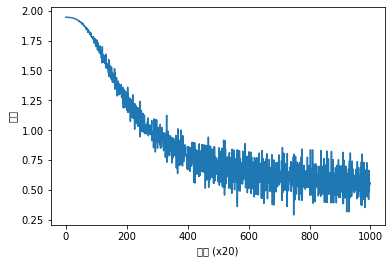

you [ 1.185  0.944 -1.085 -1.382 -1.142]
say [-1.215 -1.214  1.218 -0.367  0.538]
goodbye [ 0.773  1.054 -0.933 -0.524 -0.689]
and [-1.058 -1.079  1.061  1.708  1.574]
i [ 0.775  1.065 -0.923 -0.513 -0.692]
hello [ 1.173  0.957 -1.091 -1.389 -1.151]
. [-1.007 -1.029  1.    -1.404 -1.54 ]


In [ ]:
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
#batch_size = 3
#max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

#contexts는 (6,2,7)이 된다

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
  print(word, word_vecs[word_id])

#4장

##4.1.2 Embedding 계층 구현

In [ ]:
import numpy as np

W = np.arange(21).reshape(7, 3)
print(W)
print('\n')
# 행렬에서 한 행 추출
print(W[2])
print('\n')
print(W[5])
print('\n')
# 행렬에서 여러 행을 추출
idx = np.array([1, 0, 3, 0])
print(W[idx])


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]


[6 7 8]


[15 16 17]


[[ 3  4  5]
 [ 0  1  2]
 [ 9 10 11]
 [ 0  1  2]]


In [ ]:
import numpy as np

class Embedding:
  def __init(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.idx = None
  
  def forward(self, idx):
    W,  = self.params
    self.idx = idx
    out = W[idx]
    return out

  def backward(self, dout):
    '''dW,  = self.grads
    dW[...] = 0
    dW[self.idx] = dout #실은 나쁜 예
    return None'''

    dW, = self.grads
    dW[...] = 0

    for i, word_id in enumerate(self.idx):      # i 에는 인덱스 값을 주고, word_id에는 그 값을 준다
      #dW[word_id] += dout[i]

    #또는
       np.add.at(dW, self.idx, dout)        # dout을 dW의 self.idx번째 행에 더해준다.



##4.2.4 다중 분류에서 이진 분류로(구현)

In [ ]:
class EmbeddingDot:
  def __init__(self, W):
    self.embed = Embedding(W)
    self.params = self.embed.params
    self.grads = self.embed.grads
    self.cache = None

  def forward(self, h, idx):
    target_W = self.embed.forward(idx)
    out = np.sum(target_W * h, axis=1)

    self.cache = (h, target_W)
    return out

  def backward(self, dout):
    h, target_W = self.cache
    dout = dout.reshape(dout.shape[0], 1)   #dout.shape[0]은 행의 갯수

    dtarget_W = dout * h
    self.embed.backward(dtarget_W)
    dh = dout * target_W
    return dh

##4.2.6 네거티브 샘플링의 샘플링 기법

In [ ]:
import numpy as np

# 0에서 9까지의 숫자 중 하나를 무작위로 샘플링
print(np.random.choice(10))

# words에서 하나만 무작위로 샘플링
words = ['you', 'say', 'goodbye', 'I', 'hello', '.']
print(np.random.choice(words))

# 5개만 무작위로 샘플링(중복있음)
print(np.random.choice(words, size=5))

# 5개만 무작위로 샘플링(중복없음)
print(np.random.choice(words, size=5, replace=False))

# 확률 분포에 따라 샘플링
p = [0.5, 0.1, 0.05, 0.2, 0.05, 0.1]
print(np.random.choice(words, p=p))

2
you
['you' '.' 'hello' 'say' 'hello']
['goodbye' '.' 'say' 'I' 'you']
you


In [ ]:
p = [0.7, 0.29, 0.01]
new_p = np.power(p, 0.75)
new_p /= np.sum(new_p)
print(new_p)

[0.64196878 0.33150408 0.02652714]


In [ ]:
import numpy as np
import sys,os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from ch04.negative_sampling_layer import UnigramSampler

corpus = np.array([0, 1, 2, 3, 4, 1, 2, 3])
power = 0.75
sample_size = 2

sampler = UnigramSampler(corpus, power, sample_size)
target = np.array([1, 3, 0])
negative_sample = sampler.get_negative_sample(target)
print(negative_sample)
print(negative_sample[:, 0])

[[2 4]
 [2 1]
 [2 3]]
[2 2 2]


In [ ]:
class NegativesamplingLoss:
  def __init__(self, W, corpus, powert=0.75, sample_size=5):
    self.sample_size = sample_size
    self.sampler = UnigramSampler(corpus, power, sample_size)
    self.loss_layers = [SigmoidWithLoss() for _ in range(sample_size +1)]
    self.embed_dot_layers = [EmbeddingDot(W) for _ in range(sample_size + 1)]
    self.params, self.grads = [], []

    for layer in self.embed_dot_layers:
      self.params += layer.params
      self.grads += layer.grads

  def forward(self, h, target):
    batch_size = target.shape[0]
    negative_sample = sampleer.get_negative_sample(target)

    # 긍정적 예 순전파
    score = self.embed_dot_layers[0].forward(h,target)
    correct_label = np.ones(batch_size, dtype=np.int32)
    loss = self.loss_layers[0].forward(score, correct_label)

    # 부정적 예 순전파
    negative_label = np.zeros(batch_size, dtype=np.int32)
    for i in range(self.sample_size):
      negative_target = negative_sample[:, i]
      score = self.embed_dot_layers[1 + i].forward(h, negative_target)
      loss += self.loss_layer[1 + i].forward(score, negative_label)

    return loss


  def backward(self, dout=1):
    dh = 0
    for l0, l1 in zip(self.loss_layers, self.embed_dot_layers):
      dscore = l0.backward(dout)
      dh += l1.backward(dscore)

    return dh



##4.3.1 CBOW 모델 구현

In [ ]:
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.np import *  # import numpy as np
from common.layers import Embedding
from ch04.negative_sampling_layer import NegativeSamplingLoss


class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')

        # 계층 생성
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)  # Embedding 계층 사용
            self.in_layers.append(layer)
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75, sample_size=5)

        # 모든 가중치와 기울기를 배열에 모은다.
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss

    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None


In [ ]:
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ===============================================
# config.GPU = True
# ===============================================
import pickle
from common.trainer import Trainer
from common.optimizer import Adam
from ch04.cbow import CBOW
from ch04.skip_gram import SkipGram
from common.util import create_contexts_target, to_cpu, to_gpu
from dataset import ptb


# 하이퍼파라미터 설정
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

# 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

contexts, target = create_contexts_target(corpus, window_size)
if config.GPU:
    contexts, target = to_gpu(contexts), to_gpu(target)

# 모델 등 생성
model = CBOW(vocab_size, hidden_size, window_size, corpus)
# model = SkipGram(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# 학습 시작
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 나중에 사용할 수 있도록 필요한 데이터 저장
word_vecs = model.word_vecs
if config.GPU:
    word_vecs = to_cpu(word_vecs)
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'  # or 'skipgram_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)


| 에폭 1 |  반복 1 / 9295 | 시간 0[s] | 손실 4.16
| 에폭 1 |  반복 21 / 9295 | 시간 1[s] | 손실 4.16
| 에폭 1 |  반복 41 / 9295 | 시간 3[s] | 손실 4.15
| 에폭 1 |  반복 61 / 9295 | 시간 4[s] | 손실 4.12
| 에폭 1 |  반복 81 / 9295 | 시간 6[s] | 손실 4.04
| 에폭 1 |  반복 101 / 9295 | 시간 7[s] | 손실 3.92
| 에폭 1 |  반복 121 / 9295 | 시간 8[s] | 손실 3.77
| 에폭 1 |  반복 141 / 9295 | 시간 10[s] | 손실 3.62
| 에폭 1 |  반복 161 / 9295 | 시간 11[s] | 손실 3.48
| 에폭 1 |  반복 181 / 9295 | 시간 13[s] | 손실 3.37
| 에폭 1 |  반복 201 / 9295 | 시간 14[s] | 손실 3.26
| 에폭 1 |  반복 221 / 9295 | 시간 16[s] | 손실 3.13
| 에폭 1 |  반복 241 / 9295 | 시간 17[s] | 손실 3.07
| 에폭 1 |  반복 261 / 9295 | 시간 19[s] | 손실 3.02
| 에폭 1 |  반복 281 / 9295 | 시간 20[s] | 손실 2.94
| 에폭 1 |  반복 301 / 9295 | 시간 22[s] | 손실 2.91


KeyboardInterrupt: ignored

##4.3.3 CBOW 모델 평가

In [ ]:
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')


from common.util import most_similar, analogy
import pickle


pkl_file = '/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/ch04/cbow_params.pkl'


with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)



[query] you
 we: 0.6103515625
 someone: 0.59130859375
 i: 0.55419921875
 something: 0.48974609375
 anyone: 0.47314453125

[query] year
 month: 0.71875
 week: 0.65234375
 spring: 0.62744140625
 summer: 0.6259765625
 decade: 0.603515625

[query] car
 luxury: 0.497314453125
 arabia: 0.47802734375
 auto: 0.47119140625
 disk-drive: 0.450927734375
 travel: 0.4091796875

[query] toyota
 ford: 0.55078125
 instrumentation: 0.509765625
 mazda: 0.49365234375
 bethlehem: 0.47509765625
 nissan: 0.474853515625
--------------------------------------------------

[analogy] king:man = queen:?
 woman: 5.16015625
 veto: 4.9296875
 ounce: 4.69140625
 earthquake: 4.6328125
 successor: 4.609375

[analogy] take:took = go:?
 went: 4.55078125
 points: 4.25
 began: 4.09375
 comes: 3.98046875
 oct.: 3.90625

[analogy] car:cars = child:?
 children: 5.21875
 average: 4.7265625
 yield: 4.20703125
 cattle: 4.1875
 priced: 4.1796875

[analogy] good:better = bad:?
 more: 6.6484375
 less: 6.0625
 rather: 5.21875
 slow

#5장 순환 신경망(RNN)

##5.3.1 RNN 계층구현

In [ ]:
import numpy as np


class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.dot(h_prev, Wh) + np.dot(x, Wx) + b
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache

        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.dot(h_prev.T, dt)
        dh_prev = np.dot(dt, Wh.T)
        dWx = np.dot(x.T, dt)
        dx = np.dot(dt, Wx.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev


##5.3.2 Time RNN 계층 구현

In [ ]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh = None, None
        self.stateful = stateful

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None


    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs



##5.5.1 RNNLM 학습과 평가

In [ ]:
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
from common.time_layers import *

class SimpleRnnlm:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn

    #가중치 초기화
    embed_W = (rn(V,D) / 100).astype('f')
    rnn_Wx = (rn(D, H) / np.sqrt(D).astype('f')
    rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
    rnn_b = np.zeros(H).astype('f')

    affine_W = (rn(H, V) / np.aqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')

    #계층 생성
    self.layers = {
        TimeEmbedding(embed_W),
        TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
        TimeAffine(affine_W, affine_b)
    }
    self.loss_layer = TimeSoftmaxWithLoss()
    self.rnn_layer = self.layers[1]

    #모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads


    def forward(self, xs, ts):
      for layer in self.layer:
        xs = layer.forward(xs)
      loss = self.loss_layer.forward(xs, ts)
      return loss

    def backward(self, dout=1):
      dout = self.loss_layer.backward(dout)
      for layer in reversed(self.layers):
        dout = layer.backward(dout)
      return dout

      

##5.5.3 RNNNLM의 학습 코드

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
from common.optimizer import SGD
from dataset import ptb
from ch05.simple_rnnlm import SimpleRnnlm

# 하이퍼파리미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100   # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]    # 입력
ts = corpus[1:]     # 출력(정답 레이블)
data_size = len(xs)
print(' 말뭉치 크기 : %d, 어휘 수 : %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 1 각 미니배치에서 샘플을 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size) ]

for epoch in range(max_epoch):
  for iter in range(max_iters):
    # 2 미니배치 획득
    batch_x = np.empty((batch_size, time_size), dtype= 'i')
    batch_t = np.empty((batch_size, time_size), dtype= 'i')
    for t in range(time_size):
      for i, offset in enumerate(offsets):
        batch_x[i, t] = xs[(offset + time_idx) % data_size]
        batch_t[i, t] = ts[(offset + time_idx) % data_size]

      time_idx += 1 

    # 기울기를 구하여 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)
    total_loss += loss
    loss_count += 1

  # 3 에폭마다 퍼플렉서티 평가
  ppl = np.exp(total_loss / loss_count)
  print('| 에폭 %d | 퍼플렉서티 평가 %.2f' % (epoch+1, ppl))
  ppl_list.append(float(ppl))
  total_loss, loss_count = 0, 0

 말뭉치 크기 : 1000, 어휘 수 : 418
| 에폭 1 | 퍼플렉서티 평가 378.81
| 에폭 2 | 퍼플렉서티 평가 248.06
| 에폭 3 | 퍼플렉서티 평가 221.51
| 에폭 4 | 퍼플렉서티 평가 213.44
| 에폭 5 | 퍼플렉서티 평가 204.55
| 에폭 6 | 퍼플렉서티 평가 202.56
| 에폭 7 | 퍼플렉서티 평가 198.34
| 에폭 8 | 퍼플렉서티 평가 196.55
| 에폭 9 | 퍼플렉서티 평가 192.07
| 에폭 10 | 퍼플렉서티 평가 192.30
| 에폭 11 | 퍼플렉서티 평가 189.26
| 에폭 12 | 퍼플렉서티 평가 191.53
| 에폭 13 | 퍼플렉서티 평가 189.04
| 에폭 14 | 퍼플렉서티 평가 189.48
| 에폭 15 | 퍼플렉서티 평가 189.19
| 에폭 16 | 퍼플렉서티 평가 185.20
| 에폭 17 | 퍼플렉서티 평가 183.23
| 에폭 18 | 퍼플렉서티 평가 179.56
| 에폭 19 | 퍼플렉서티 평가 180.70
| 에폭 20 | 퍼플렉서티 평가 181.48
| 에폭 21 | 퍼플렉서티 평가 179.69
| 에폭 22 | 퍼플렉서티 평가 174.84
| 에폭 23 | 퍼플렉서티 평가 173.20
| 에폭 24 | 퍼플렉서티 평가 173.96
| 에폭 25 | 퍼플렉서티 평가 170.73
| 에폭 26 | 퍼플렉서티 평가 170.19
| 에폭 27 | 퍼플렉서티 평가 165.24
| 에폭 28 | 퍼플렉서티 평가 163.66
| 에폭 29 | 퍼플렉서티 평가 162.79
| 에폭 30 | 퍼플렉서티 평가 155.15
| 에폭 31 | 퍼플렉서티 평가 156.07
| 에폭 32 | 퍼플렉서티 평가 152.47
| 에폭 33 | 퍼플렉서티 평가 153.45
| 에폭 34 | 퍼플렉서티 평가 145.22
| 에폭 35 | 퍼플렉서티 평가 142.67
| 에폭 36 | 퍼플렉서티 평가 140.14
| 에폭 37 | 퍼플렉서티 평가 134.16
| 에폭 38 | 퍼플렉서티 평가 1

#6장 게이트가 추가된 RNN

## 6.1.3 기울기 소실과 기울기 폭발의 원인

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_

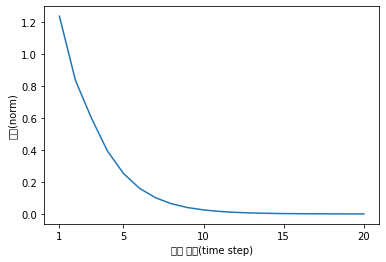

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2    # 미니배치 크기
H = 3    # 은닉 상태 벡터의 차원 수
T = 20   # 시계열 데이터의 길이

dh = np.ones((N, H))
np.random.seed(3)     #  재현할 수 있도록 난수의 시드 고정
#Wh = np.random.randn(H, H)
Wh = np.random.randn(H, H) * 0.5

norm_list = []
for t in range(T):
  dh = np.matmul(dh, Wh.T)
  norm = np.sqrt(np.sum(dh**2)) / N
  norm_list.append(norm)

  # 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

##6.1.4 기울기 폭발 대책

In [ ]:
import numpy as np


dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0

def clip_grads(grads, max_norm):
  total_norm = 0
  for grad in grads:
    total_norm += np.sum(grad ** 2)
  total_norm = np.sqrt(total_norm)

  rate = max_norm / (total_norm + 1*e - 6)
  if rate < 1:
    for grad in grads:
      grad +=rate

##6.3 LSTM 구현

In [ ]:
class LSTM:
    def __init__(self, Wx, Wh, b):
        '''

        Parameters
        ----------
        Wx: 입력 x에 대한 가중치 매개변수(4개분의 가중치가 담겨 있음)
        Wh: 은닉 상태 h에 대한 가장추 매개변수(4개분의 가중치가 담겨 있음)
        b: 편향（4개분의 편향이 담겨 있음）
        '''
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev, c_prev):
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)
        return h_next, c_next

    def backward(self, dh_next, dc_next):
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev



##6.3.1 Time LSTM 구현

In [ ]:
class TimeLSTM:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        self.h, self.c = h, c

    def reset_state(self):
        self.h, self.c = None, None



##6.4 LSTM을 사용한 언어 모델

In [ ]:

import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.time_layers import *
from common.base_model import BaseModel


class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()


#6.5 RNNLM 추가 개선

##6.5.4 개선된 RNNLM 구현

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from common.time_layers import *
from common.np import *  # import numpy as np
from common.base_model import BaseModel


class BetterRnnlm(BaseModel):
    '''
     LSTM 계층을 2개 사용하고 각 층에 드롭아웃을 적용한 모델이다.
     아래 [1]에서 제안한 모델을 기초로 하였고, [2]와 [3]의 가중치 공유(weight tying)를 적용했다.

     [1] Recurrent Neural Network Regularization (https://arxiv.org/abs/1409.2329)
     [2] Using the Output Embedding to Improve Language Models (https://arxiv.org/abs/1608.05859)
     [3] Tying Word Vectors and Word Classifiers (https://arxiv.org/pdf/1611.01462.pdf)
    '''
    def __init__(self, vocab_size=10000, wordvec_size=650,
                 hidden_size=650, dropout_ratio=0.5):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b1 = np.zeros(4 * H).astype('f')
        lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b2 = np.zeros(4 * H).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.layers = [
            TimeEmbedding(embed_W),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
            TimeDropout(dropout_ratio),
            TimeAffine(embed_W.T, affine_b)  # weight tying!!
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layers = [self.layers[2], self.layers[4]]
        self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs, train_flg=False):
        for layer in self.drop_layers:
            layer.train_flg = train_flg

        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts, train_flg=True):
        score = self.predict(xs, train_flg)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        for layer in self.lstm_layers:
            layer.reset_state()


In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')


from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ==============================================
# config.GPU = True
# ==============================================
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity, to_gpu
from dataset import ptb
from ch06.better_rnnlm import BetterRnnlm


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

if config.GPU:
    corpus = to_gpu(corpus)
    corpus_val = to_gpu(corpus_val)
    corpus_test = to_gpu(corpus_test)

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
                time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 퍼플렉서티: ', ppl)

    if best_ppl > ppl:
        best_ppl = ppl
        model.save_params()
    else:
        lr /= 4.0
        optimizer.lr = lr

    model.reset_state()
    print('-' * 50)


# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)


Done
Done
| 에폭 1 |  반복 1 / 1327 | 시간 4[s] | 퍼플렉서티 9999.52
| 에폭 1 |  반복 21 / 1327 | 시간 73[s] | 퍼플렉서티 4340.90


#7장

##7.1.2 문장 생성 구현

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm




class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x)
            p = softmax(score.flatten())

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        return self.lstm_layer.h, self.lstm_layer.c

    def set_state(self, state):
        self.lstm_layer.set_state(*state)


class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x).flatten()
            p = softmax(score).flatten()

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        states = []
        for layer in self.lstm_layers:
            states.append((layer.h, layer.c))
        return states

    def set_state(self, states):
        for layer, state in zip(self.lstm_layers, states):
            layer.set_state(*state)

[[1]]


In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)
print(start_id)


you tube he even consented to forget for quotations to play productivity today and them than late to the moment.
 first company said silver along at a leveraged buy-out of raw cancer.
 require more money and far the last educational policy is n't aimed at all but contended or instead strategy for the flag it does n't come down.
 mr. honecker wants to have a matter.
 mr. sharon said the participation my cause in the kansas city had become assured on his job.
 but mr. roman has received a new loan campaign which is strong
316


##7.1.3 더 좋은 문장으로

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')
from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
'''
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)

'''
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)


--------------------------------------------------
the meaning of life is the ad pool.
 people filled with the potential system of businessmen that have continue long need to fill major stocks what is in the market at a time when a white knight is a bad thing.
 bob ingersoll is a secret and he tried to encourage greater up about a qualified group of positions together not the one thing at a recent.
 whatever it is is the only thing is a good farmer.
 but in recent years we 're doing a concept of the and throwing out their package against the company.
 last issue


In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(char_to_id)

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189


{'1': 0, '6': 1, '+': 2, '7': 3, '5': 4, ' ': 5, '_': 6, '9': 7, '2': 8, '0': 9, '3': 10, '8': 11, '4': 12}
(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


##7.3.1 Encoder 클래스

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')
from common.time_layers import *
from common.base_model import BaseModel


class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]

    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout


In [ ]:

class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))

        return sampled


##7.3.3 Seq2Seq 클래스

In [ ]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled


##7.3.4 seq2seq 평가

In [ ]:
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()



ModuleNotFoundError: ignored

In [ ]:
# coding: utf-8
import sys, os

sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/ch07')
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master')
from common.time_layers import *
from ch07.seq2seq import Seq2seq, Encoder


class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads


In [ ]:
import sys, os

sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/ch07')
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()



| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.09
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 3.98
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.51
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 2.02
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.96
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.91
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.89
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.87
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.86
| 에폭 1 |  반복 181 / 351 | 시간 11[s] | 손실 1.86
| 에폭 1 |  반복 201 / 351 | 시간 13[s] | 손실 1.85
| 에폭 1 |  반복 221 / 351 | 시간 14[s] | 손실 1.85
| 에폭 1 |  반복 241 / 351 | 시간 15[s] | 손실 1.85
| 에폭 1 |  반복 261 / 351 | 시간 17[s] | 손실 1.85
| 에폭 1 |  반복 281 / 351 | 시간 18[s] | 손실 1.84
| 에폭 1 |  반복 301 / 351 | 시간 19[s] | 손실 1.84
| 에폭 1 |  반복 321 / 351 | 시간 21[s] | 손실 1.84
| 에폭 1 |  반복 341 / 351 | 시간 22[s] | 손실 1.82
Q 77+85  
T 162 
☒ 102 
---
Q 975+164
T 1139
☒ 1011
---
Q 582+84 
T 666 
☒ 102 
---
Q 8+155  
T 163 
☒ 102 
---
Q 367+55 
T 422 
☒ 102 
---
Q 600+257
T 857 
☒ 1011
---
Q 761+292
T 1053
☒ 1011
---
Q 830+597
T 1427
☒ 1011
--

KeyboardInterrupt: ignored

In [ ]:
# coding: utf-8
import sys, os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master")
sys.path.append('os.chdir')

import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('정확도 %.3f%%' % (acc * 100))


model.save_params()

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08


KeyboardInterrupt: ignored